In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
df=pd.read_csv("insurance.csv")

In [39]:
df.shape

(1338, 7)

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
lblenc=LabelEncoder()

In [45]:
df["region"]=lblenc.fit_transform(df["region"])
df["smoker"]=lblenc.fit_transform(df["smoker"])
df["sex"]=lblenc.fit_transform(df["region"])

Text(0.5, 1.0, 'Distribution among the charges')

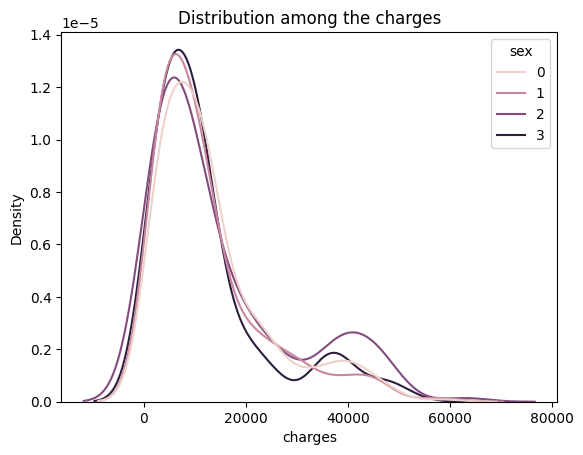

In [46]:
sns.kdeplot(x="charges",data=df,hue="sex")
plt.title("Distribution among the charges")

Text(0.5, 1.0, 'Distribution among the bmi')

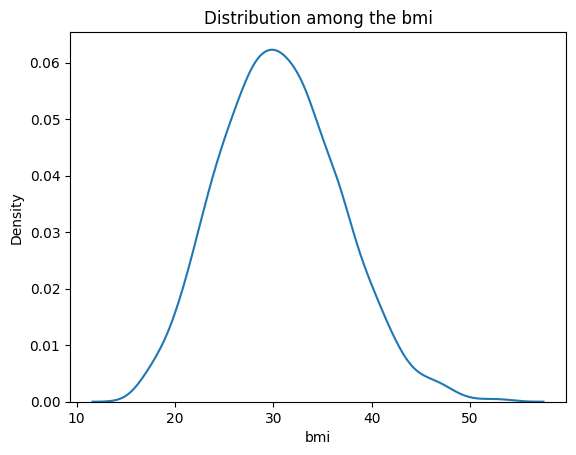

In [47]:
sns.kdeplot(x="bmi",data=df)
plt.title("Distribution among the bmi")

Text(0.5, 1.0, 'Distribution among the age')

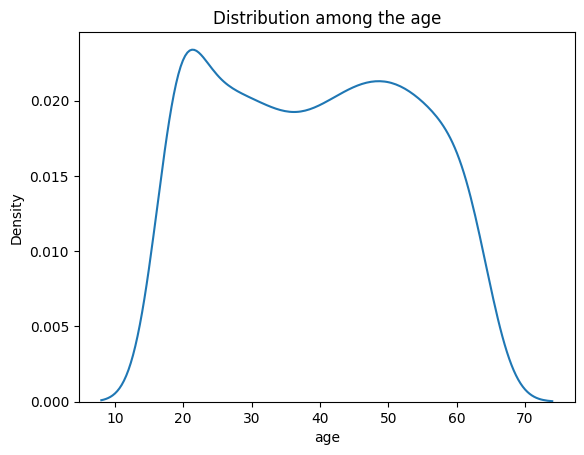

In [48]:
sns.kdeplot(x="age",data=df)
plt.title("Distribution among the age")

Text(0.5, 1.0, 'Distribution among the genders')

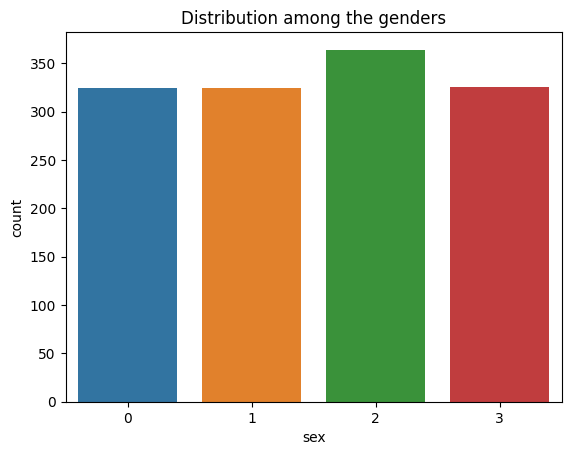

In [49]:
sns.countplot(x="sex",data=df)
plt.title("Distribution among the genders")

Text(0.5, 1.0, 'Distribution among the age')

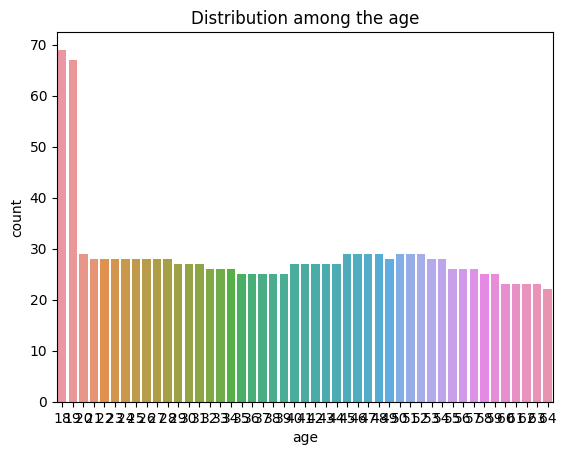

In [50]:
sns.countplot(x="age",data=df)
plt.title("Distribution among the age")

Text(0.5, 1.0, 'Distribution among the region')

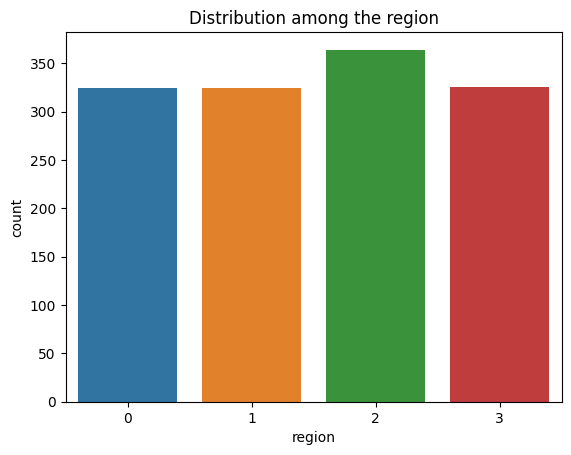

In [51]:
sns.countplot(x="region",data=df)
plt.title("Distribution among the region")

<Axes: >

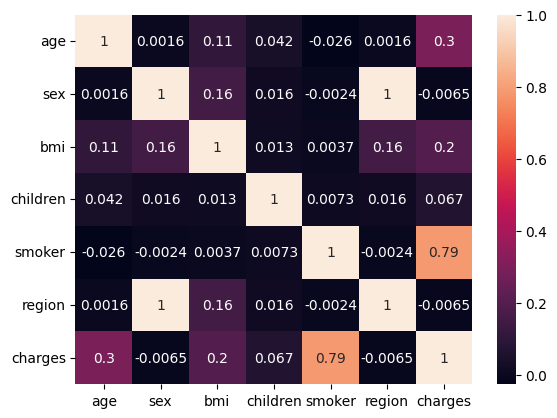

In [52]:
sns.heatmap(df.corr(),annot=True)

In [54]:
x=df.drop(labels="charges",axis=1)
y=df["charges"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [62]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=model.predict(x_test)

In [64]:
y_pred

array([ 4941.17552888,  9551.37206839, 11414.26710354, 25485.16935817,
        7047.95930171,   673.38292304,  1650.94231767, -1206.79039293,
        1834.21917014, 14337.96186307,  9842.85352932, 26279.68414361,
       14460.93089325,  9420.02329158,  5370.67237389,  9853.59891659,
        5946.09070453,  5997.19053503,  4780.51558164, 14784.41763995,
        2396.45853249, 12221.89436679,  1977.86133809,  4269.42803685,
        4125.18607042,  8955.31503562,  1443.64561107, 12379.54757757,
        3966.4096274 , 29197.1630604 ,  8953.17021437, 38274.45960148,
        8749.62518031, 13065.87920232, 24581.17470128, 15710.06113132,
       12432.52478477, 29690.72631048,  6990.66809012,  3099.55036623,
       26633.46999684,  4126.54231153,  5543.02205033, 38624.86205441,
       27217.64933425, 11811.78009344, 10815.35997847,  9864.46494705,
       13212.88640366,  7050.93313373, 33218.61103583,  5141.14766527,
       32175.36772787, 32346.73326482, 15585.7480994 ,  3819.06471021,
      

In [68]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7512381273554272
